## 1) 웹 크롤링으로 비정형 데이터 수집
- 23년 1~7월 총 7개월 간의 5개 아모레 브랜드에 관한 자료 수집 (설화수, 라네즈, 이니스프리, 에뛰드, 일리윤)
- 텍스트 정제

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re

DATA_PATH = "/content/drive/MyDrive/멀티캠퍼스 자료/Machine Learning/data/"
SEED = 42

In [ ]:
train = pd.read_csv(f"{DATA_PATH}samsung_mayjuly_news.csv")
train.shape

(1087, 4)

In [ ]:
train

,date,title,link,content
0,2023-07-31 05:57:00,MZ=아이폰? 삼성의 반격…갤Z플립5로 '아재폰' 꼬리표 뗀다,https://n.news.naver.com/mnews/article/008/000...,[]
1,2023-07-31 12:09:01,"건설사 성적표 발표…삼성물산, 시공능력 10년째 1위",https://n.news.naver.com/mnews/article/666/000...,[]
2,2023-07-31 08:23:01,"""사전구매시 저장용량이 2배""…삼성, 갤럭시Z5 사전판매",https://n.news.naver.com/mnews/article/014/000...,[]
3,2023-07-31 09:51:01,삼성 갤럭시Z5 사전판매…용량 2배 확장에 전용 디자인까지,https://n.news.naver.com/mnews/article/011/000...,[]
4,2023-07-31 08:49:33,"삼성전자, FIFA+ 채널 론칭",https://n.news.naver.com/mnews/article/001/001...,[]
...,...,...,...,...
1082,2023-07-26 09:00:13,"삼성전자, 3년 연속 기업상 '녹색마스터피스상' 수상",https://n.news.naver.com/mnews/article/119/000...,[]
1083,2023-07-27 13:50:53,"[IR종합] '비수기 선방' 삼성, 폴더블로 상승세 이어간다",https://n.news.naver.com/mnews/article/421/000...,[]
1084,2023-07-27 11:16:01,"[컨콜] 삼성전자 ""내년 HBM 생산능력 2배 확대""",https://n.news.naver.com/mnews/article/031/000...,[]
1085,2023-07-24 09:04:01,"삼성전자, 새 폴더블폰 언팩 알리기 총력…남산 ‘N서울타워’ 옥외 광고 시작",https://n.news.naver.com/mnews/article/366/000...,[]


In [ ]:
train['title'] = train['title'].str.replace("[^a-zA-Z가-힣ㄱ-ㅎ0-9.,!? ]" , "",regex=True)


In [ ]:
train['title']

0                MZ아이폰? 삼성의 반격갤Z플립5로 아재폰 꼬리표 뗀다
1                  건설사 성적표 발표삼성물산, 시공능력 10년째 1위
2                  사전구매시 저장용량이 2배삼성, 갤럭시Z5 사전판매
3               삼성 갤럭시Z5 사전판매용량 2배 확장에 전용 디자인까지
4                              삼성전자, FIFA 채널 론칭
                         ...                   
1082                삼성전자, 3년 연속 기업상 녹색마스터피스상 수상
1083              IR종합 비수기 선방 삼성, 폴더블로 상승세 이어간다
1084                  컨콜 삼성전자 내년 HBM 생산능력 2배 확대
1085    삼성전자, 새 폴더블폰 언팩 알리기 총력남산 N서울타워 옥외 광고 시작
1086                   한국 언팩은 삼성 헤리티지 자신감 드러낸 것
Name: title, Length: 1087, dtype: object

In [ ]:
train_text = train['title']

## 2) 용어 리스트 구축
- 1차 - KKM 세종 말뭉치 기준, 형태소별 통계 전체횟수 5회 이상 단어들 중 '인물'에 대한 형태소로 제한하여 단어 추출
(http://kkma.snu.ac.kr/statistic)
 - 총 1825개 형용사(VA) 중 504개 추출
 - 총 2643개 어근(XR) 중 681개 추출

- 2차 - 웹 크롤링 데이터 중 제외된 형태소 추가 보완
 - 형용사: 125개, 어근: 157개

- 최종 리스트 구축




### 1차 - KKM에서 `이미지와 관련된` 단어 추출
- 형용사(VA) : kkm_va_words
- 어근(XR) : kkm_xr_words

In [ ]:
kkm_va_words = ['크', '새롭','어렵','쉽','아름답','어리','힘들','젊','아프','나쁘','싫','무섭',
                 '커다랗','엄청나','지나치','희','검','어둡','옳','괜찮','밝','바쁘','가볍','뜨겁','하얗','예쁘','무겁','맑','즐겁','부드럽',
                 '재미있','약하','낯설','편하','낫','비싸','강하','슬프','춥','놀랍','곱','뛰어나','낡','거칠','안타깝','부끄럽','기쁘','바르',
                 '두렵','반갑','흔하','착하','차갑','싸','조그맣','외롭','올바르','빨갛','멋지','날카롭','급하','친하','굵','굳','아쉽',
                 '느리','환하','더럽','그립','괴롭','귀엽','우습','가늘','어리석','귀하','둥글','부럽','노랗','귀찮','재밌','세','까맣','두껍',
                 '어지럽','거세','차','흐리','파랗','밉','아깝','시끄럽','눈부시','얇','진하','힘겹','점잖','고프','까다롭','힘차','폭넓',
                 '못하','잘나','사납','두드러지','끈질기','험하', '이쁘',' 누렇',' 시커멓','오래','낯익','배고프','끊임없','남다르','지겹',
                 '비','쓸데없','못나','벅차','묘하','기막히','서럽','서글프','세차','값싸','그르','모질','가엾','잘','참되','허옇','엷',
                 '색다르','동그랗','게으르','메마르','벌겋','쑥스럽','엄하','어이없','가느다랗','너그럽','서투르','하찮','시리','매끄럽',
                 '우스꽝스럽','고달프','서툴','뻔하','값지','멋있','잘생기','질기','멍하','새까맣','연하','추하','틀리','억세','안되','여리',
                 '싱겁','쓰라리','어처구니없','역겹','재미없','수줍','뿌옇','천하','징그럽','순하','흉하','안쓰럽','야하','빼어나','속상하',
                 '유별나','매섭','보잘것없','못생기','못되','시퍼렇','기다랗','짓궂','언짢','잽싸','형편없','값비싸','흥겹','새파랗','둥그렇',
                 '둔하','부시','재빠르','딱하','배부르','싱그럽','별나','쓰리','야무지','새하얗','어질','한결같','활기차','궂','아리','갸날프',
                 '건방지','독하','선하','훤하','시뻘겋','탁하','무디','우렁차','능하','철없','뽀얗','번거롭','해롭','쓸모없','성가시','정겹',
                 '애처롭','퍼렇','분하','관계없','네모나','얄밉','차디차','장하','이롭','달갑','헤프','앳되','후하','푸르르','쎄','힘세',
                 '힘없','보드랍','새빨갛','아니꼽','미심쩍','해맑','미덥','수상쩍','굳세','만만찮','동떨어지','껄끄럽','험상궂',
                 '변함없','드세','앙증맞','깡마르','구슬프','날쌔','실없','쓰디쓰','시꺼멓','을씨년스럽','검푸르','발갛','시원찮','뻘겋',
                 '어여쁘','당차','고되','모나','다부지','흐드러지','드럽','짙푸르','약삭빠르','방정맞','뜸하','사이좋','천연덕스럽','무르',
                 '볼품없','상스럽','새카맣','격하','거침없','허하','희뿌옇','앙칼지','심술궂','아리땁','끈덕지','역하','가녀리','노오랗',
                 '굼뜨','희디희','가엽','살갑','하잘것없','정신없','버릇없','올곧','악하','청승맞','별스럽','구리','샛노랗','길하','빈틈없',
                 '필요없','남부럽','멋들어지','쪼그맣','똥그랗','매몰차','파아랗','속좁','막되','노하','얌전하','얇디얇','얍삽하','연푸르',
                 '번거럽','똘똘하','야물딱지','예쁘장하','투박스럽','게을러빠지','껄렁껄렁하','믿음직스럽','사근사근하','기','될성부르',
                 '약아빠지','예스럽','쇼킹하','놀라웁','맑디맑','능청맞','곱디곱','징하','모지','꽁하','따스','늙','유머러스하','예쁘장스럽',
                 '촌시럽','보오얗','동그렇','모자르','모잘르','간지','힘쎄','자애롭','시덥잖','쌍스럽','쑥쓰럽','앙징맞','밉살맞','후덥',
                 '여물','찐하','찡하','둥굴','기차','자애롭','시덥잖','쌍스럽','쑥쓰럽','앙징맞','얄따랗','밉살맞','버얼겋','높푸르','찐하',
                 '찡하','기차','주제넘','꺼멓','어리숙하','얄궂','참하','끄떡없','희망차','기운차','희부옇','안스럽','어줍잖','의롭','능글맞',
                 '간드러지','쌀쌀맞','자그맣','볼썽사납','희멀겋','도드라지','재수없','걸','빠알갛','뜬금없','살지','악착같','멀겋','의좋','꾸밈없',
                 '같잖','잡스럽','냉하','싸하','빡세','궁상맞','밉살스럽','하이얗','익살맞','쬐그맣','암팡지','어쭙잖','분별없','달갑잖','똑바르',
                 '실하','박하','고깝','특별나','새삼스럽','스스럼없','좀스럽','손색없','후지','짠하','시답잖','허물없','변변찮','따습','맹하',
                 '애닯','주책없','뚱하','의심쩍','쬐끄맣','섹시하','곱다랗','시건방지','특출나','옹골차','막돼먹','곰살궂','가소롭','유하','속없',
                 '지각없','거멓','대단찮','기똥차','깊푸르','따시','뜨시','맥없','싯누렇','로맨틱하','도탑','허여멀겋','모지락스럽','향그럽',
                 '옹골지','성마르','성스럽','꼴사납','시답','동글','마르','대차','조그만하','인상깊','야멸차','염치없','쌩뚱맞','매스껍','극성맞',
                 '깊디깊','감명깊','반하','궁하','덜떨어지','나즈막하','요상하','째쨰하','촌스럽','뽀오얗','색스럽','다사롭','둔덕지',
                 '맵싸하','까아맣','감미롭','짖궂','시덥','어줍','몽글','값있','눈꼴사납']

In [ ]:
len(kkm_va_words)

504

In [ ]:
kkm_xr_words = ['강력', '훌륭', '바람직', '따뜻', '깨끗', '화려', '궁금', '진정', '진지', '대단', '익숙', '다양', '조용', '시원',
                     '답답', '소중', '활발', '엉뚱', '평범', '엄격', '솔직', '불쌍', '어색', '억울', '절실', '쓸쓸', '생생', '민감',
                     '신선', '강렬', '만만', '끔찍', '지루', '소박', '이상', '단단', '격렬', '한심', '초라', '과감', '튼튼', '유명',
                     '유연', '섬세', '똑똑', '단호', '지독', '섭섭', '차분', '간절', '순진', '애매', '심심', '불쾌', '절박', '은밀',
                     '예민', '깔끔', '싱싱', '달콤', '잔잔', '유쾌', '서늘', '따스', '싸늘', '집요', '성급', '황당', '떳떳', '유치',
                     '지저분', '우아', '과격', '거룩', '위태', '거대', '단정', '느긋', '용감', '저렴', '허전', '든든', '창백', '멍청',
                     '독특', '조급', '급급', '고귀', '생소', '희한', '친근', '어수선', '철저', '거북', '썰렁', '담담', '세심', '경쾌',
                     '허술', '원만', '예리', '야릇', '비겁', '근사', '상쾌', '허름', '진부', '씩씩', '반듯', '비장', '포근', '고약',
                     '고상', '미숙', '정중', '웅장', '아찔', '난해', '안이', '냉혹', '못마땅', '열렬', '고단', '수상', '탄탄', '강인',
                     '뻔뻔', '연약', '아늑', '자그마', '추악', '앙상', '관대', '묵직', '치열', '엉성', '큼직', '순박', '구수', '화사',
                     '험악', '일관', '광활', '애틋', '끈끈', '자상', '무시무시', '삭막', '경건', '발랄', '의젓', '착실', '꾸준', '쌀쌀',
                     '왜소', '처참', '숭고', '날씬', '상냥', '교활', '처량', '산뜻', '영리', '납작', '산만', '무뚝뚝', '애절', '진솔',
                     '얄팍', '뻣뻣', '담백', '아련', '오묘', '훈훈', '말끔', '온화', '침울', '어정쩡', '신랄', '공손', '냉철', '날렵',
                     '아담', '해괴', '투박', '민첩', '육중', '우람', '외람', '묵묵', '근소', '영특', '아둔', '괴팍', '거무스름', '뾰로통',
                     '예쁘장', '졸렬', '온건', '빵빵', '담대', '따듯', '다정다감', '께름칙', '핼쑥', '흉포', '따끈', '달착지근', '서글서글',
                     '어리벙벙', '현란', '홀쭉', '멀뚱', '공명정대', '유약', '끈적', '위태위태', '동글납작', '팔팔', '소소', '살벌', '순진무구',
                     '믿음직', '허약', '느릿', '주도면밀', '둥그스름', '거무스레', '소탈', '미적지근', '호쾌', '걸걸', '누르스름', '우스꽝',
                     '호화', '동그스름', '치명', '심약', '파릇', '저속', '영민', '발칙', '명랑', '미련', '똘똘', '새콤', '완고', '굵직',
                     '소심', '갑갑', '당돌', '당당', '늘씬', '우수', '용', '미진', '빽빽', '의연', '매끈', '음울', '합리', '척박', '근엄',
                     '면밀', '상큼', '노련', '건전', '강경', '푸근', '풍족', '가련', '괘씸', '조잡', '시들', '세련', '헐렁', '누추', '자잘',
                     '활달', '적대', '완연', '늠름', '스산', '숙연', '얼떨떨', '어엿', '자신만만', '어두컴컴', '갸름', '쾌활', '고지식', '방만',
                     '경박', '건장', '꼿꼿', '따분', '초췌', '부당', '왕성', '기특', '미지근', '건실', '밋밋', '어렴풋', '길쭉', '도도',
                     '향긋', '구태의연', '초연', '정갈', '호젓', '수려', '솔깃', '준엄', '시큰둥', '침침', '꿋꿋', '정결', '번듯', '단아',
                     '캄캄', '불온', '시무룩', '빳빳', '비열', '지긋', '꺼림칙', '음탕', '영악', '야비', '냉랭', '노골', '따사', '비범', '찜찜',
                     '대범', '어눌', '흥미진진', '어둑', '영롱', '조촐', '절절', '깜찍', '푸르스름', '세세', '절친', '풍만', '낭자', '유용',
                     '칙칙', '쟁쟁', '기민', '대담', '수수', '심드렁', '진귀', '얼얼', '말쑥', '음침', '삐딱', '옹색', '추잡', '뻐근', '장대',
                     '풋풋', '훤칠', '결연', '냉엄', '뻔', '비릿', '인자', '유력', '방자', '가혹', '다정', '괴이', '야트막', '화창', '애잔',
                     '고고', '굳건', '갸륵', '매정', '아리송', '취약', '덤덤', '온순', '심란', '조악', '장중', '농후', '넓적', '울적', '해박',
                     '둔탁', '무고', '까무잡잡', '무지막지', '촘촘', '원숙', '느끼', '능통', '호탕', '휘황', '음험', '황당무계', '흉흉', '퀴퀴',
                     '강직', '으슥', '격', '저돌', '잔인', '음습', '뚱뚱', '말짱', '빡빡', '괴상', '푹신', '원대', '고즈넉', '꾀죄죄', '반반',
                     '깐깐', '눅눅', '독실', '기구', '망측', '처연', '이슥', '선량', '수척', '황홀', '낭랑', '싹싹', '맹랑', '명석', '꼼꼼',
                     '야박', '듬직', '고매', '걸쭉', '가뿐', '유익', '후줄근', '어수룩', '황폐', '유순', '특출', '통렬', '고리타분', '우직',
                     '섹시', '견실', '강대', '무정', '중후', '깜깜', '비천', '두둑', '둔중', '순전', '희끄무레', '구부정', '무덤덤', '유복',
                     '은근', '불미', '망연', '도톰', '까칠', '요란', '평이', '청명', '퀭', '과', '옹졸', '너저분', '파리', '무던', '묘연',
                     '완곡', '청아', '나약', '능란', '초조', '무모', '엉큼', '어둠침침', '혹심', '처절', '깍듯', '알뜰', '알량', '거무튀튀',
                     '고루', '다소곳', '가무잡잡', '청량', '쾌청', '정밀', '질겁', '아뜩', '아릿', '간명', '으리으리', '정정당당', '청초', '강건',
                     '뜨악', '망망', '등등', '괴괴', '난잡', '간사', '파르스름', '휘황찬란', '용의주도', '부지런', '불그레', '뜨뜻', '진득',
                     '진중', '범상', '펑퍼짐', '고만고만', '편편', '출중', '감미', '소담', '병약', '성성', '각별', '공고', '과대', '가증',
                     '일천', '왁자', '유려', '먹먹', '미천', '미려', '과도', '괄괄', '기기묘묘', '터프', '앙증', '멀쑥', '딴딴', '궁벽',
                     '고결', '고아', '시시껄렁', '어두침침', '이상야릇', '형형', '혼탁', '쩨쩨', '찝찝', '저릿', '신성', '거무죽죽', '휑뎅그렁',
                     '노르스름', '능수능란', '불그죽죽', '편평', '해쓱', '침통', '털털', '토실', '지순', '지엄', '우울', '울울', '신속', '심난',
                     '심원', '살뜰', '뜨끔', '마뜩', '망극', '가열', '찌뿌드드', '호화찬란', '득의만만', '로맨틱', '어리숙', '에로틱', '현격',
                     '쫄깃', '장쾌', '적의', '소홀', '앙큼', '애처', '박정', '범연', '부박', '명철', '무결', '다기', '교교', '극미', '추',
                     '푸르뎅뎅', '푸르죽죽', '감', '드라마틱', '뻑적지근', '사근사근', '애매모호', '어머어마', '무지근', '오종종', '이쁘장', '황막',
                     '흉악', '컬컬', '소략', '소복', '심장', '양순', '무감', '무망', '껌껌', '발그스름', '간구', '덥수룩', '도도록', '부정직',
                     '편벽', '희끗', '척척', '친숙', '자별', '정대', '정숙', '엔간', '오롯', '완서', '위중', '서름', '선뜻', '막강', '망칙',
                     '냉정', '노숙', '우두망찰', '흐리멍덩', '고요', '거만', '암울', '괴상망측', '두리뭉실', '둥글넓적', '불그스름', '불효막심',
                     '살기등등', '시금털털', '그들먹', '판판', '훤출', '천진', '측은', '정치', '역연', '요상', '유일', '숭엄', '식상', '방정',
                     '분망', '말똥', '무계', '괄목', '간악', '걸찍', '고만', '뜨뜻미지근', '쇠']

In [ ]:
len(kkm_xr_words)

681

### 2차 - 단어 보완 및 최종 리스트

- KKM에 없으면서, 데이터에 있었던 단어들 중에서 추가 단어 선별



- 보완 단어 리스트

In [ ]:
complement_kkm_va_keywords = [
    '간절하', '강렬하', '경쾌하', '고고하', '과감하', '과하', '관대하', '굉장하', '교묘하', '구수하', '굳건하', '굵직하', '깐깐하', '깜찍하',
    '깨끗하', '꾸준하', '끈끈하', '나른하', '난감하', '난처하', '난해하', '날렵하', '날씬하', '납작하', '누렇', '느긋하', '느끼하', '능수능란하',
    '능숙하', '단단하', '단정하', '단호하', '달달하', '달콤하', '담담하', '담백하', '답답하', '대견하', '대단하', '든든하', '따듯하', '따뜻하',
    '따스하', '딱딱하', '또렷하', '뚜렷하', '뜨끈하', '뜻깊', '막중하', '매끈하', '매콤하', '무난하', '미미하', '미약하', '밋밋하', '발랄하',
    '발칙하', '복잡하', '불쌍하', '뻔뻔하', '뿌듯하', '상큼하', '새콤하', '생뚱맞', '생생하', '생소하', '서운하', '섬세하', '섭섭하', '세심하',
    '소소하', '수수하', '시원하', '신기하', '신선하', '싸늘하', '씁쓸하', '씩씩하', '애절하', '어눌하', '어색하', '어설프', '얼떨떨하',
    '열악하', '예민하', '오지', '우아하', '웅장하', '위대하', '유연하', '유창하', '잔잔하', '쟁쟁하', '저렴하', '절실하', '절친하', '정갈하',
    '조그마하', '조급하', '지루하', '지저분하', '진솔하', '진지하', '차분하', '참신하', '촉촉하', '친근하', '쾌활하', '쿨하', '큼직하', '탁월하',
    '탄탄하', '투박하', '튼튼하', '평범하', '풋풋하', '핫하', '향긋하', '화기애애하', '화려하', '화사하', '화창하', '활발하', '훈훈하', '훌륭하'
]

In [ ]:
len(complement_kkm_va_keywords)

125

In [ ]:
complement_kkm_xr_keywords = [
    '가지런', '거창', '견고', '겸허', '굉장', '교묘', '귀중', '그윽', '기괴', '기발', '기이', '나른', '난감', '넉넉', '널널', '능숙',
    '다채', '단순', '단조', '단출', '달짝지근', '대견', '돈독', '두근', '딱딱', '떠들석', '떠들썩', '떨떠름', '또렷', '뚜렷', '막막',
    '막연', '말랑', '매콤', '맹렬', '머쓱', '멀쩡', '명쾌', '명확', '모호', '몽롱', '무난', '무도', '무색', '뭉근', '뭉클', '미묘', '미미',
    '미세', '미약', '복잡', '복잡다단', '분주', '불순', '비아냥', '사소', '상세', '생경', '서운', '선명', '성대', '세밀', '수더분', '수월',
    '순탄', '술렁', '시끌', '신기', '심각', '심상', '심오', '쌉쌀', '쏠쏠', '씁쓸', '아스라', '어마어마', '어중간', '어지간', '엄', '엄정',
    '열악', '온전', '완만', '용이', '위대', '유창', '으르렁', '은은', '의미심장', '의아', '이룩', '자세', '잠잠', '잡다', '적당', '적절',
    '절묘', '정교', '정당', '정연', '정정', '정확', '조그마', '주요', '준수', '중요', '즐비', '지대', '진기', '짜릿', '짤막', '찬란',
    '참신', '창창', '청청', '촉촉', '축축', '충분', '치밀', '친밀', '칼칼', '쾌적', '쿵쾅', '큼지막', '탁월', '텁텁', '테이크', '톡톡',
    '통통', '특별', '특유', '특이', '팔랑', '팽팽', '편', '평평', '폭신', '풍부', '풍성', '한가', '합당', '험난', '혹독', '홀가분', '화',
    '화기애애', '확고', '확실', '확연', '환', '획일', '후덥지근', '흐릿', '흐뭇', '흔', '희귀', '희미',
]

In [ ]:
len(complement_kkm_xr_keywords)

157

- 최종 용어리스트 업데이트

In [ ]:
kkm_va_words = kkm_va_words + complement_kkm_va_keywords
kkm_xr_words = kkm_xr_words + complement_kkm_xr_keywords

In [ ]:
len(kkm_va_words), len(kkm_xr_words), len(kkm_va_words + kkm_xr_words)

(629, 838, 1467)

## 3) 키워드 명사화
- 형용사(VA), 어근(XR) 형태의 형태소들을 명사형으로 키워드에 적합하게 변형함

### 형용사(VA) to 명사

In [ ]:
def va_to_noun(adjective_list):
    results = []
    for adjective in adjective_list:
        last_char = adjective[-1]

        if (ord(last_char) - 44032) % 28 != 0: #마지막 글자 받침이 있는 경우

            if (ord(last_char) - 44032) % 28 == 17: #받침이 ㅂ일때 제거 후 '움' 추가
                last_jamo = chr(ord(last_char) - 17) #ㅂ(17)
                result = adjective[:-1] + last_jamo + '움'

            elif (ord(last_char) - 44032) % 28 == 27: #받침이 ㅎ일때 ㅁ으로 대체
                last_jamo = chr(ord(last_char) - 27 + 16) #ㅎ(27), ㅁ(16)
                result = adjective[:-1] + last_jamo

            else:
                result = adjective + "음"  #이외 받침 일때 '음'
        else:
            last_jamo = chr(ord(last_char) + 16) #마지막 글자 받침 없다면 ㅁ 받침을 추가
            result = adjective[:-1] + last_jamo

        results.append(result)
    return results

### 어근(XR) to 명사

In [ ]:
def xr_to_noun(xr_list):
    results = []
    for xr in xr_list:
        result = xr + '함'

        results.append(result)
    return results

# Train Data

## 1) 토큰화 및 형태소 추출
- Kiwi 라이브러리를 이용
- 사람의 이미지와 연관된 품사인 형용사(VA), 어근(XR) 추출

In [ ]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.15.0-py3-none-any.whl size=30602629 sha256=17a1ad881be7b2105a79a8ba4c7f27210ce4ce581a2056418a6a9739faa28c4f
  Stored in directory: /root/.cache/pip/wheels/f3/55/41/ca474338ece1bc4314b01445f64ff002d71e19df45575a16e2
Successfully built kiwipiepy-model


In [ ]:
import kiwipiepy
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
stopwords =  Stopwords()
kiwi = Kiwi()

- 형용사(VA)

In [ ]:
train_text = [str(item) for item in train_text]

In [ ]:
train_kiwi_va_words =[]

for idx,text in enumerate(train_text):
    result = kiwi.tokenize(text,stopwords=stopwords)
    tmp = [token.form for token in result if token.tag in ['VA'] and token.form in kkm_va_words] # 형용사
    tmp = va_to_noun(tmp) # 형용사 -> 명사
    train_kiwi_va_words.append(tmp)

In [ ]:
len(train_kiwi_va_words)

1087

In [ ]:
train_kiwi_va_words

[[],
 [],
 [],
 [],
 [],
 ['비쌈'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['얇음'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['약함'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['핫함'],
 [],
 ['비쌈'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


- 어근(XR)

In [ ]:
train_kiwi_xr_words =[]

for idx,text in enumerate(train_text):
    result = kiwi.tokenize(text,stopwords=stopwords)
    tmp = [token.form for token in result if token.tag in ['XR'] and token.form in kkm_xr_words] # 어근
    tmp = xr_to_noun(tmp) # 어근 -> 명사
    train_kiwi_xr_words.append(tmp)

In [ ]:
len(train_kiwi_xr_words)

1087

In [ ]:
train_kiwi_xr_words

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['묵직함'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


- 형용사와 어근 합치기

In [ ]:
train_list = []

for i in range(len(train_kiwi_va_words)):
    tmp = train_kiwi_va_words[i] + train_kiwi_xr_words[i]
    train_list.append(tmp)

len(train_list)

1087

## 2) TF-IDF : Top20 인물 키워드 추출

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.4 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Kkma
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
[' '.join(text) for text in train_list]

['',
 '',
 '',
 '',
 '',
 '비쌈',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '얇음',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '묵직함',
 '',
 '',
 '',
 '',
 '약함',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '핫함',
 '',
 '비쌈',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [ ]:
def extract_keywords_tfidf(text_list, num_keywords=20):

    merged_text_list = [' '.join(text) for text in text_list] # 2차원 형태를 1차원으로 변환

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(merged_text_list)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # 합산
    total_tfidf = np.sum(tfidf_matrix, axis=0).A1

    # TF-IDF 값에 따라 정렬된 단어들의 인덱스를 얻음
    sorted_indices = total_tfidf.argsort()[::-1]

    # 상위 num_keywords 개의 단어와 해당 단어들의 TF-IDF 스코어 추출
    top_keywords = [(feature_names[idx], total_tfidf[idx]) for idx in sorted_indices[:num_keywords]]

    return top_keywords

In [ ]:
train_top20 = extract_keywords_tfidf(train_list, num_keywords=20)

print("TF-IDF 기반 키워드 및 스코어 추출:")
for keyword, score in train_top20:
    print(f"{keyword} - Score: {score}")

TF-IDF 기반 키워드 및 스코어 추출:
얇음 - Score: 8.614785271786088
심각함 - Score: 4.0
비쌈 - Score: 4.0
훌륭함 - Score: 1.0
묵직함 - Score: 1.0
강함 - Score: 1.0
괜찮음 - Score: 1.0
나쁨 - Score: 1.0
낯익음 - Score: 1.0
뛰어남 - Score: 1.0
멋짐 - Score: 1.0
생생함 - Score: 1.0
핫함 - Score: 1.0
쏠쏠함 - Score: 1.0
약함 - Score: 1.0
젊음 - Score: 1.0
조용함 - Score: 1.0
강력함 - Score: 1.0
예쁨 - Score: 0.7886945350355267


## 6) BPI 유사도 : 인물 키워드 분석
- BPI(Brand Personality Index) : 광고 모델 및 브랜드들의 개성을 나타내는 5개의 지표
- 5개의 지표: Sincerity, Excitement, Competence, Sophistication, Ruggedness
- 인물의 키워드와 5개의 지표 간의 유사도를 각각 구함
- 최종적으로 인물이 어떤 지표에 포함되는지 확인

### 삼성 키워드 분석

In [ ]:
train_top20_keywords = [keyword[0] for keyword in train_top20]
sincerity = ["정직함","다정함","건전함","친근함","진실함","본래의","사실의"]
excitement = ["과감함","멋짐","상상력있음","독특함","유행선도적임","젊음","현대적임"]
competence = ["성공적임","믿음직함","지적임","안전함","전문적임","선두의"]
sophistication = ["매력적임","여성스러움","우아함","화려함","부드러움"]
ruggedness = ["거침","남성적임","외향적임","튼튼함"]

In [ ]:
train_top20_keywords

['얇음',
 '심각함',
 '비쌈',
 '훌륭함',
 '묵직함',
 '강함',
 '괜찮음',
 '나쁨',
 '낯익음',
 '뛰어남',
 '멋짐',
 '생생함',
 '핫함',
 '쏠쏠함',
 '약함',
 '젊음',
 '조용함',
 '강력함',
 '예쁨']

In [ ]:
from gensim.models import Word2Vec

docs = [train_top20_keywords] + [sincerity] + [excitement] + [competence] + [sophistication] + [ruggedness]
model = Word2Vec(sentences=docs, vector_size=145, window=4, hs=1, negative=0, min_count=1, sg=1)

train_result = []
for keyword in train_top20_keywords:
    columns = {'top20 키워드': keyword}
    for category, words in [('진실성', sincerity),
                            ('흥미로움', excitement),
                            ('유능함', competence),
                            ('세련됨', sophistication),
                            ('강인함', ruggedness)]:
        sim_sum = sum(model.wv.similarity(w1=keyword, w2=word) for word in words)
        columns[category] = sim_sum / len(words)
    train_result.append(columns)

train_result = pd.DataFrame(train_result)

train_result

,top20 키워드,진실성,흥미로움,유능함,세련됨,강인함
0,얇음,0.039072,0.014246,-0.027011,0.021865,0.018238
1,심각함,-0.004765,0.021466,0.018796,-0.099843,0.047591
2,비쌈,0.032593,0.042478,-0.019887,0.000329,0.023157
3,훌륭함,0.002481,-0.009191,-0.002080,0.006272,0.034524
4,묵직함,-0.016779,-0.013932,0.000607,0.022946,-0.061179
5,강함,0.053958,0.008782,-0.006776,0.040695,-0.072384
6,괜찮음,0.013676,0.039161,-0.019572,-0.053422,-0.012812
7,나쁨,-0.013759,-0.007950,0.012891,-0.012796,0.057820
8,낯익음,0.002930,0.047384,-0.058933,-0.017991,-0.066161
9,뛰어남,-0.035563,0.004544,-0.042898,-0.002165,-0.034792


In [ ]:
train_result.mean(axis=0, numeric_only=True)

진실성     0.003839
흥미로움    0.020599
유능함    -0.003522
세련됨    -0.008141
강인함    -0.013959
dtype: float64

In [ ]:
train_result.mean(axis=0, numeric_only=True).idxmax()

'흥미로움'

# 방사형 그래프를 활용하여 비교

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,715 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120500 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지
plt.rc('font', family='NanumBarunGothic') # 폰트 적용

<ipython-input-67-9ba8c7bb3b32>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grade_nj = [score for score in train_result.mean(axis=0)]
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/cor

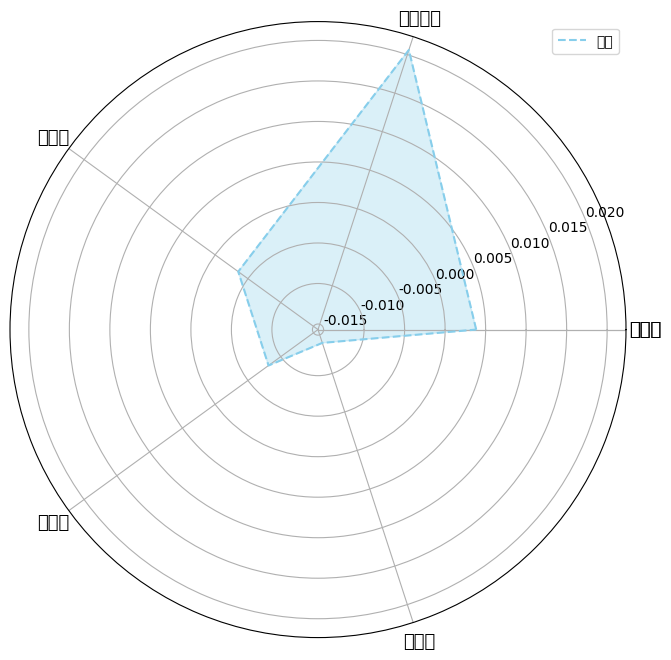

In [ ]:
categories = ['진실성', '흥미로움', '유능함', '세련됨', '강인함']
categories = [*categories, categories[0]]

grade_nj = [score for score in train_result.mean(axis=0)]
# grade_bp = [score for score in test_result.mean(axis=0)]

grade_nj = [*grade_nj, grade_nj[0]]
# grade_bp = [*grade_bp, grade_bp[0]]

label_loc = np.linspace(start=0, stop=2*np.pi, num=len(grade_nj))

plt.figure(figsize=(8,8)) # 차트의 size
ax = plt.subplot(polar=True) # 원형으로 표현할지(True)
plt.xticks(label_loc, labels=categories, fontsize=13) # X축 눈금 표시지만 원형이기 때문에 각 키워드 폰트 보여주기 위한 코드
ax.plot(label_loc, grade_nj, label='삼성', linestyle='dashed', color='skyblue') # 라벨, 선스타일, 색상
ax.fill(label_loc, grade_nj, color='skyblue', alpha=0.3) # 차트 안의 색깔 채우기, alpha는 진하기 정도
# ax.plot(label_loc, grade_bp, label='블랙핑크', linestyle='dotted', color='violet')
# ax.fill(label_loc, grade_bp, color='violet', alpha=0.3)
ax.legend() # 범례추가(우측 상단내용)
plt.show()
